In [1]:
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
Brand = []
#Camera = []
Type = []
Battery_Type = []
Control_Range = []
Power_Consumption = []
Weight = []
Rating = []
Offer = []
Price = []


for u in range(1,25):
    url = f"https://www.flipkart.com/search?q=Drones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={u}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    container = soup.find_all("div",class_="tUxRFH")
    for i in container:
        info = i.find("div", class_ = "KzDlHZ")
        brand = re.findall("^(\w+)",info.text)
        #camera = re.findall("camera (\d+\w)| (\d.+) With Camera| (\d.+)camera| (\w+ Dual) Camera|Camera (\w+ \w+) \HD|(\dK UHD)|(HD)|(\dk) CAMERA| (\d.+) Camera|(WiFi) Camera",i.text)
        drone_type = re.findall("Type: (\w+\s\w+) Ra", i.text)
        battery = re.findall("ery Type: (.+) Batt", i.text)
        control_range = re.findall("Range: (\d+ m|\d+ ft)", i.text)
        power = re.findall("Power Consumption: (.+ W)", i.text)
        weight = re.findall("Weight: (.+ kg|\d+ g)", i.text)
        rating = i.find("span",class_ = "Y1HWO0")
        price_info = i.find("div",class_ = "Nx9bqj _4b5DiR")
        offer_info = i.find("div",class_ = "UkUFwK") 
        Brand.append(brand[0])
        #Camera.append(camera[0])

        if rating:
            Rating.append(rating.text)
        else:
            Rating.append(np.nan)

        if price_info :
            price = re.findall("(\d+,\d+)",price_info.text)
            if price:
                Price.append(price[0])
            else :
                Price.append(np.nan)
        else :
            Price.append(np.nan)

        if offer_info:
            offer = re.findall("^(\d+)%",offer_info.text)
            if offer:
                Offer.append(offer[0])
            else :
                Offer.append(np.nan)
        else :
            Offer.append(np.nan)

        if weight:
            Weight.append(weight[0])
        else:
            Weight.append(np.nan)

        if drone_type:
            Type.append(drone_type[0])
        else:
            Type.append(np.nan)
        if battery:
           Battery_Type.append(battery[0])
        else:
            Battery_Type.append(np.nan)

        if control_range:
            Control_Range.append(control_range[0])
        else:
            Control_Range.append(np.nan)
        
            
        if power:
            Power_Consumption.append(power[0])
        else :
            Power_Consumption.append(np.nan)
        

In [54]:
data = {
    "Brand" : Brand,
    "Type" : Type,
    "Battery Type" : Battery_Type,
    "Control Range" : Control_Range,
    "Power Consumption" : Power_Consumption,
    "Weight" : Weight,
    "Rating" : Rating,
    "Offer (%)" : Offer,
    "Price" : Price
}

In [55]:
Drone_df = pd.DataFrame(data)
Drone_df

,Brand,Type,Battery Type,Control Range,Power Consumption,Weight,Rating,Offer (%),Price
0,Clubics,Mini DroneControl,Lithium,100 ft,NaN,300 g,2.8,80,"1,799"
1,Clubmall,Professional DroneControl,Lithium,102 m,3 W,0.3 kg,2.9,62,"1,889"
2,Antman,Professional DroneControl,Lithium,100 ft,NaN,0.4 kg,2.8,77,"1,930"
3,RBR,Professional DroneControl,Lithium,60 ft,3 W,0.3 kg,3,49,"2,019"
4,Ezerio,Mini DroneControl,Lithium,100 m,NaN,239 g,3,69,"3,910"
...,...,...,...,...,...,...,...,...,...
571,Barbie,Mini DroneControl,Lithium,60 ft,NaN,0.25 kg,NaN,69,"2,705"
572,Barbie,Mini DroneControl,Lithium,65 ft,NaN,0.25 kg,NaN,69,"2,705"
573,GARNER,Mini DroneControl,Lithium,100 ft,NaN,300 g,NaN,57,"2,986"
574,Barbie,Mini DroneControl,Lithium,60 ft,NaN,0.25 kg,NaN,69,"2,705"


In [56]:
#Drone_df.to_csv("Drone Dataset.csv", index=False)

In [57]:
drone_df = pd.read_csv("Drone Dataset.csv")
drone_df

,Brand,Type,Battery Type,Control Range,Power Consumption,Weight,Rating,Offer (%),Price
0,Clubics,Mini DroneControl,Lithium,100 ft,NaN,300 g,2.8,80.0,"1,799"
1,Clubmall,Professional DroneControl,Lithium,102 m,3 W,0.3 kg,2.9,62.0,"1,889"
2,Antman,Professional DroneControl,Lithium,100 ft,NaN,0.4 kg,2.8,77.0,"1,930"
3,RBR,Professional DroneControl,Lithium,60 ft,3 W,0.3 kg,3.0,49.0,"2,019"
4,Ezerio,Mini DroneControl,Lithium,100 m,NaN,239 g,3.0,69.0,"3,910"
...,...,...,...,...,...,...,...,...,...
571,Barbie,Mini DroneControl,Lithium,60 ft,NaN,0.25 kg,NaN,69.0,"2,705"
572,Barbie,Mini DroneControl,Lithium,65 ft,NaN,0.25 kg,NaN,69.0,"2,705"
573,GARNER,Mini DroneControl,Lithium,100 ft,NaN,300 g,NaN,57.0,"2,986"
574,Barbie,Mini DroneControl,Lithium,60 ft,NaN,0.25 kg,NaN,69.0,"2,705"


## General Analysis

### 1. Find Null Values and Extract Null Values and Modify Dataset 

In [58]:
drone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              576 non-null    object 
 1   Type               563 non-null    object 
 2   Battery Type       563 non-null    object 
 3   Control Range      560 non-null    object 
 4   Power Consumption  173 non-null    object 
 5   Weight             559 non-null    object 
 6   Rating             177 non-null    float64
 7   Offer (%)          558 non-null    float64
 8   Price              548 non-null    object 
dtypes: float64(2), object(7)
memory usage: 40.6+ KB


In [59]:
drone_df.dtypes

Brand                 object
Type                  object
Battery Type          object
Control Range         object
Power Consumption     object
Weight                object
Rating               float64
Offer (%)            float64
Price                 object
dtype: object

In [60]:
drone_df["Price"] = drone_df["Price"].str.replace(",","", regex= True)

In [61]:
drone_df["Price"]

0      1799
1      1889
2      1930
3      2019
4      3910
       ... 
571    2705
572    2705
573    2986
574    2705
575    2705
Name: Price, Length: 576, dtype: object

### Finding Null Values And Filling the Null Values 

In [62]:
drone_df["Type"].isnull().sum()

13

In [63]:
drone_df.fillna({"Type" : drone_df["Type"].mode()[0]}, inplace=True)

In [64]:
drone_df["Type"].isnull().sum()

0

In [65]:
drone_df["Battery Type"].isnull().sum()

13

In [66]:
drone_df.fillna({"Battery Type" : drone_df["Battery Type"].mode()[0]}, inplace=True)

In [67]:
drone_df["Battery Type"].isnull().sum()

0

In [68]:
drone_df["Control Range"].isnull().sum()

16

In [69]:
drone_df.fillna({"Control Range" : drone_df["Control Range"].mode()[0]}, inplace=True)

In [70]:
drone_df["Control Range"].isnull().sum()

0

In [71]:
drone_df["Power Consumption"].isnull().sum() # Lot Of Null Values so Drop to the Column

403

In [72]:
drone_df.drop("Power Consumption", axis= 1, inplace= True)  # Drop the Power Consumption

In [73]:
drone_df.columns

Index(['Brand', 'Type', 'Battery Type', 'Control Range', 'Weight', 'Rating',
       'Offer (%)', 'Price'],
      dtype='object')

In [74]:
drone_df["Weight"]

0        300 g
1       0.3 kg
2       0.4 kg
3       0.3 kg
4        239 g
        ...   
571    0.25 kg
572    0.25 kg
573      300 g
574    0.25 kg
575    0.25 kg
Name: Weight, Length: 576, dtype: object

### Create New Column to Weight column Convert into Kg to Grams

In [75]:
# Create New Column to Convert into Kg to Grams

drone_df['Weight'] = drone_df['Weight'].str.lower().str.strip()

def convert_to_grams(x):
    if pd.isna(x):
        return None
    if 'kg' in x:
        return float(x.replace('kg', '').strip()) * 1000
    elif 'g' in x:
        return float(x.replace('g', '').strip())
    else:
        return None

drone_df['Weight (g)'] = drone_df['Weight'].apply(convert_to_grams)

In [76]:
drone_df

,Brand,Type,Battery Type,Control Range,Weight,Rating,Offer (%),Price,Weight (g)
0,Clubics,Mini DroneControl,Lithium,100 ft,300 g,2.8,80.0,1799,300.0
1,Clubmall,Professional DroneControl,Lithium,102 m,0.3 kg,2.9,62.0,1889,300.0
2,Antman,Professional DroneControl,Lithium,100 ft,0.4 kg,2.8,77.0,1930,400.0
3,RBR,Professional DroneControl,Lithium,60 ft,0.3 kg,3.0,49.0,2019,300.0
4,Ezerio,Mini DroneControl,Lithium,100 m,239 g,3.0,69.0,3910,239.0
...,...,...,...,...,...,...,...,...,...
571,Barbie,Mini DroneControl,Lithium,60 ft,0.25 kg,NaN,69.0,2705,250.0
572,Barbie,Mini DroneControl,Lithium,65 ft,0.25 kg,NaN,69.0,2705,250.0
573,GARNER,Mini DroneControl,Lithium,100 ft,300 g,NaN,57.0,2986,300.0
574,Barbie,Mini DroneControl,Lithium,60 ft,0.25 kg,NaN,69.0,2705,250.0


In [77]:
drone_df["Weight (g)"].isna().sum()

17

In [80]:
drone_df["Weight (g)"].median()

250.0

In [81]:
drone_df.fillna({"Weight (g)" : drone_df["Weight (g)"].median()}, inplace=True)

In [82]:
drone_df["Weight (g)"].isna().sum()

0

In [83]:
drone_df["Rating"].isna().sum()

399

In [84]:
drone_df["Rating"].median()

3.0

In [85]:
drone_df.fillna({"Rating" : drone_df["Rating"].median()}, inplace=True)

In [86]:
drone_df["Rating"].isna().sum()

0

In [88]:
drone_df["Offer (%)"].isna().sum()

18

In [98]:
round(drone_df["Offer (%)"].mean(),1)

60.7

In [99]:
drone_df.fillna({"Offer (%)" : round(drone_df["Rating"].median(), 1)}, inplace=True)

In [100]:
drone_df["Offer (%)"].isna().sum()

0

In [101]:
drone_df["Price"].isna().sum()

28

In [105]:
drone_df["Price"] = drone_df["Price"].astype(float)

In [106]:
drone_df["Price"]

0      1799.0
1      1889.0
2      1930.0
3      2019.0
4      3910.0
        ...  
571    2705.0
572    2705.0
573    2986.0
574    2705.0
575    2705.0
Name: Price, Length: 576, dtype: float64

In [109]:
drone_df["Price"].median()

2705.0

In [110]:
drone_df.fillna({"Price" : drone_df["Price"].median()}, inplace=True)

In [111]:
drone_df["Price"].isna().sum()

0

In [112]:
drone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          576 non-null    object 
 1   Type           576 non-null    object 
 2   Battery Type   576 non-null    object 
 3   Control Range  576 non-null    object 
 4   Weight         559 non-null    object 
 5   Rating         576 non-null    float64
 6   Offer (%)      576 non-null    float64
 7   Price          576 non-null    float64
 8   Weight (g)     576 non-null    float64
dtypes: float64(4), object(5)
memory usage: 40.6+ KB


### Create New Column to Convert control range values (ft, feet, km, m) into meters

In [127]:
def convert_to_meters(value):
    """Convert control range values (ft, feet, km, m) into meters."""
    if pd.isna(value):
        return None

    value = str(value).lower().strip()

    # Convert feet → meters
    if 'ft' in value or 'feet' in value:
        return round(float(value.replace('feet', '').replace('ft', '').strip()) * 0.3048, 1)

    # Already in meters
    elif 'm' in value and 'km' not in value:
        return round(float(value.replace('m', '').strip()),1)

    # Convert kilometers → meters
    elif 'km' in value:
        return round(float(value.replace('km', '').strip()) * 1000,1)

    # Unknown or empty
    else:
        return None


drone_df['Range (m)'] = drone_df['Control Range'].apply(convert_to_meters)

In [128]:
drone_df

,Brand,Type,Battery Type,Control Range,Weight,Rating,Offer (%),Price,Weight (g),Range (m)
0,Clubics,Mini DroneControl,Lithium,100 ft,300 g,2.8,80.0,1799.0,300.0,30.5
1,Clubmall,Professional DroneControl,Lithium,102 m,0.3 kg,2.9,62.0,1889.0,300.0,102.0
2,Antman,Professional DroneControl,Lithium,100 ft,0.4 kg,2.8,77.0,1930.0,400.0,30.5
3,RBR,Professional DroneControl,Lithium,60 ft,0.3 kg,3.0,49.0,2019.0,300.0,18.3
4,Ezerio,Mini DroneControl,Lithium,100 m,239 g,3.0,69.0,3910.0,239.0,100.0
...,...,...,...,...,...,...,...,...,...,...
571,Barbie,Mini DroneControl,Lithium,60 ft,0.25 kg,3.0,69.0,2705.0,250.0,18.3
572,Barbie,Mini DroneControl,Lithium,65 ft,0.25 kg,3.0,69.0,2705.0,250.0,19.8
573,GARNER,Mini DroneControl,Lithium,100 ft,300 g,3.0,57.0,2986.0,300.0,30.5
574,Barbie,Mini DroneControl,Lithium,60 ft,0.25 kg,3.0,69.0,2705.0,250.0,18.3


### Save Modify Dronr Data Set

In [205]:
# drone_df.to_csv("Drone modify Dataset.csv", index= False)

### Read Modify Drone Data Set

In [2]:
drone_df1 = pd.read_csv("Drone modify Dataset.csv")
drone_df1

FileNotFoundError: [Errno 2] No such file or directory: 'Drone modify Dataset.csv'

In [4]:
drone_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          576 non-null    object 
 1   Type           576 non-null    object 
 2   Battery Type   576 non-null    object 
 3   Control Range  576 non-null    object 
 4   Weight         559 non-null    object 
 5   Rating         576 non-null    float64
 6   Offer (%)      576 non-null    float64
 7   Price          576 non-null    float64
 8   Weight (g)     576 non-null    float64
 9   Range (m)      576 non-null    float64
dtypes: float64(5), object(5)
memory usage: 45.1+ KB


In [8]:
drone_df1.dtypes

Brand             object
Type              object
Battery Type      object
Control Range     object
Weight            object
Rating           float64
Offer (%)        float64
Price            float64
Weight (g)       float64
Range (m)        float64
dtype: object

## Univariate Plots

### 1. Price Distribution

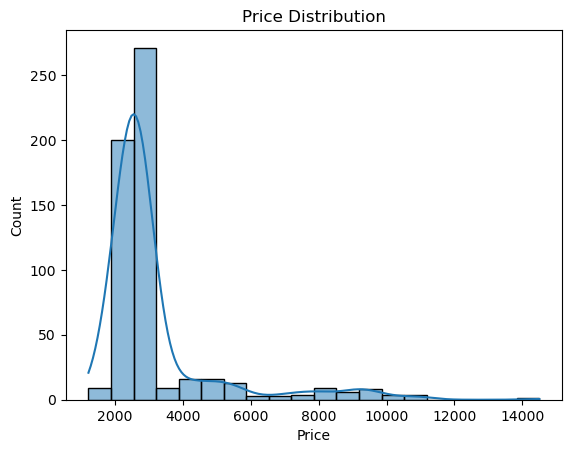

In [12]:
sns.histplot(data = drone_df1,
             x = "Price",
            bins = 20,
            kde=True)
plt.title("Price Distribution")
plt.show()

### 2. Distribution of the Battery Types

[Text(0, 0, '530'), Text(0, 0, '19'), Text(0, 0, '4'), Text(0, 0, '8'), Text(0, 0, '6'), Text(0, 0, '9')]


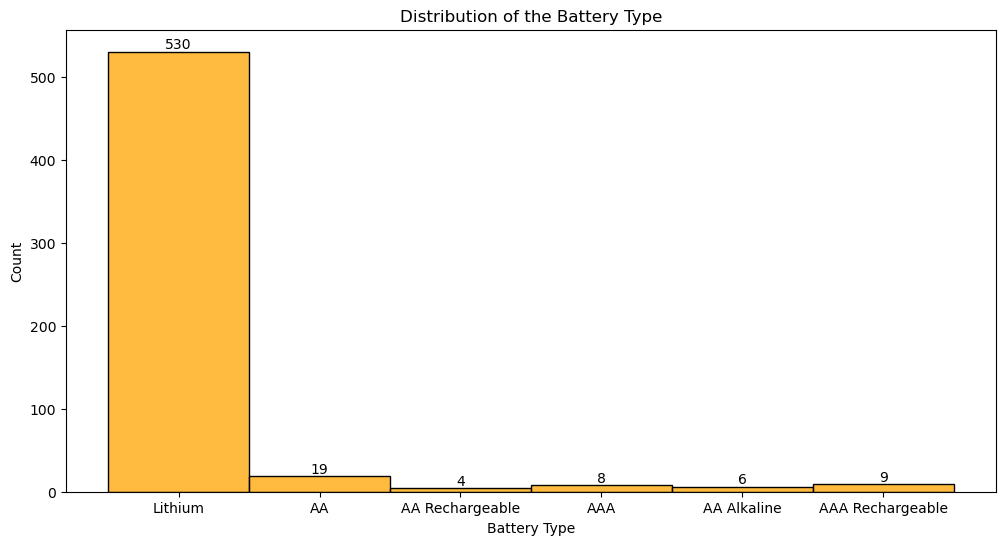

In [19]:
plt.figure(figsize = (12,6))
i = sns.histplot(data = drone_df1,
                x = "Battery Type",
                color = "orange")
for container in i.containers:
    print(i.bar_label(container))
plt.title("Distribution of the Battery Type")
plt.show()

### 3. Drone Count by Brand

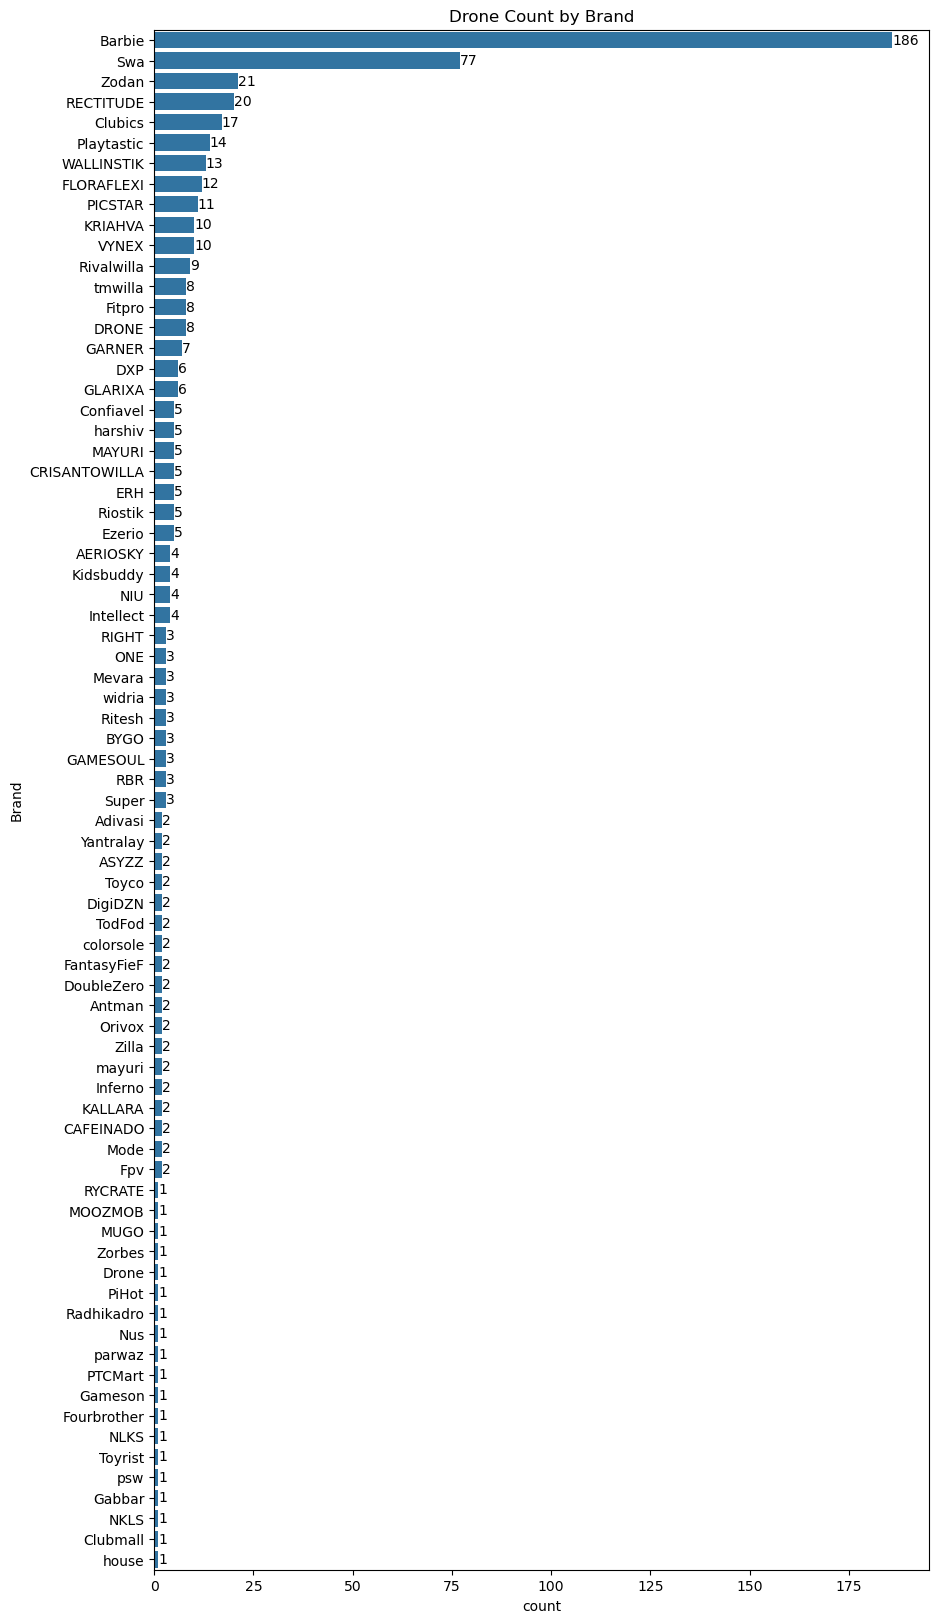

In [151]:
plt.figure(figsize=(10,20))
con = sns.countplot(data = drone_df1,
             y = "Brand",
            order=drone_df1['Brand'].value_counts().index)
for container in con.containers:
    con.bar_label(container)
plt.title("Drone Count by Brand")
plt.show()

### 4. Probability Density of Price

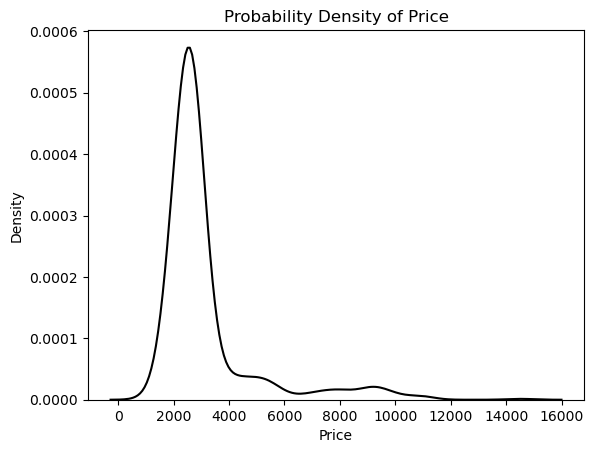

In [26]:
sns.kdeplot(drone_df1["Price"], color = "k")
plt.title("Probability Density of Price")
plt.show()

### 5. Drone Count By Type

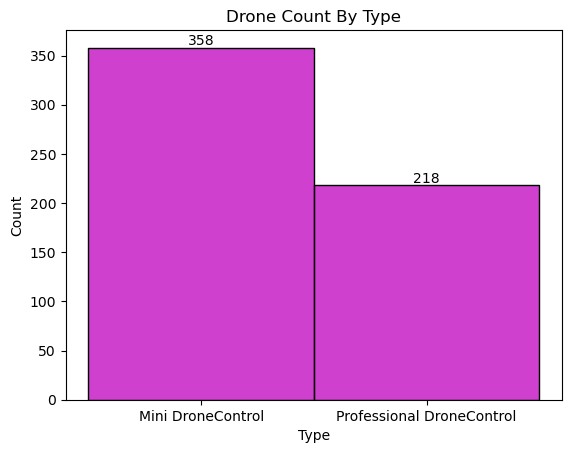

In [30]:
ty = sns.histplot(data = drone_df1, x = "Type",color = "m")
for con in ty.containers:
    ty.bar_label(con)
plt.title("Drone Count By Type")
plt.show()

### 6.Propotion of Drone Type

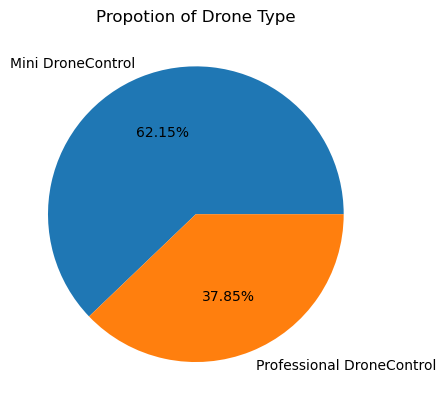

In [51]:

plt.pie(drone_df1["Type"].value_counts(),
        autopct="%0.2f%%",
        labels=["Mini DroneControl","Professional DroneControl"])
plt.title("Propotion of Drone Type")
plt.show()

In [52]:
drone_df1.head(3)

,Brand,Type,Battery Type,Control Range,Weight,Rating,Offer (%),Price,Weight (g),Range (m)
0,Clubics,Mini DroneControl,Lithium,100 ft,300 g,2.8,80.0,1799.0,300.0,30.5
1,Clubmall,Professional DroneControl,Lithium,102 m,0.3 kg,2.9,62.0,1889.0,300.0,102.0
2,Antman,Professional DroneControl,Lithium,100 ft,0.4 kg,2.8,77.0,1930.0,400.0,30.5


## Bivariate Plots

### 1. Relation Between Weight (g), Range(m)

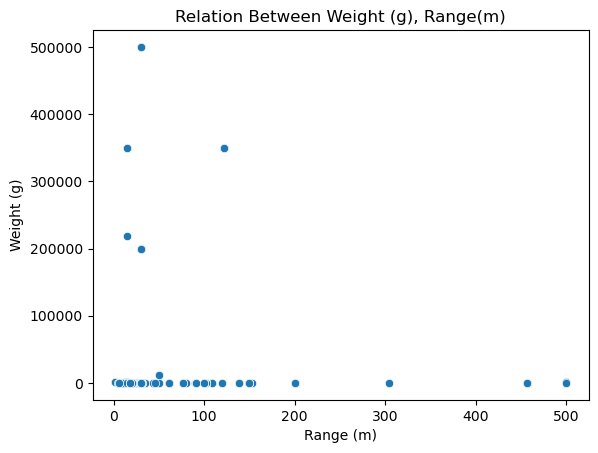

In [118]:

sns.scatterplot(data = drone_df1,
               y = "Weight (g)",
               x = "Range (m)")
plt.title("Relation Between Weight (g), Range(m)")
plt.show()

### 2. Relation Between Price, Rating

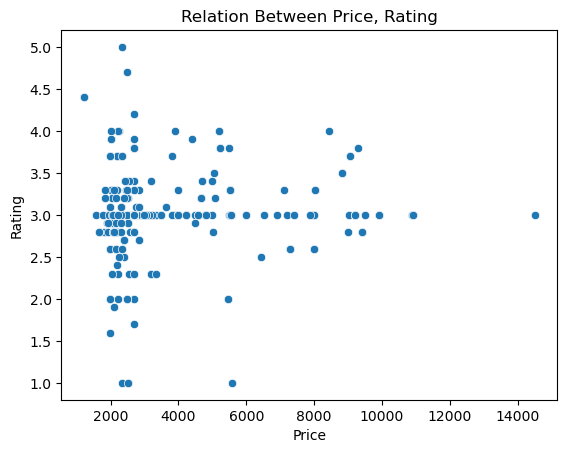

In [85]:
sns.scatterplot(data = drone_df1,
               x = "Price",
               y = "Rating")
plt.title("Relation Between Price, Rating")
plt.show()

### 3. Relation Between Offer and Price

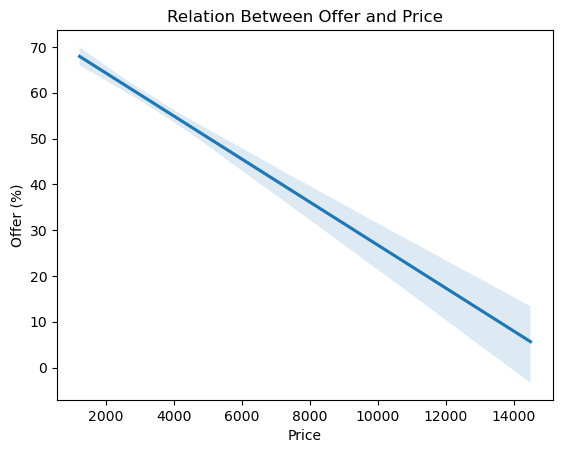

In [105]:
sns.regplot(data = drone_df1,
            y = 'Offer (%)',
            x = 'Price',
            scatter=False,)
plt.title('Relation Between Offer and Price')
plt.show()

### 4. The Mean of Price accross Different Drone Type

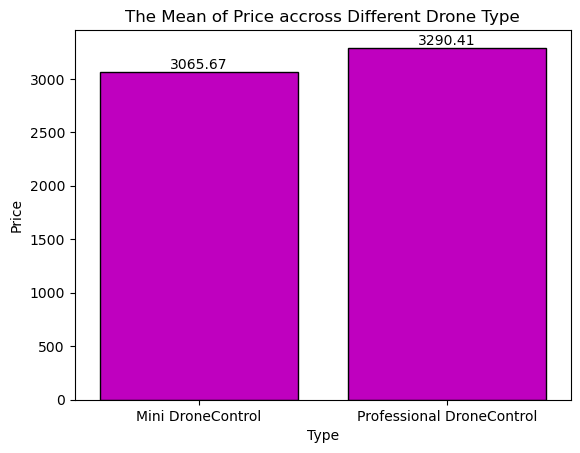

In [142]:

ty = sns.barplot(data = drone_df1,
           x = "Type",
           y = "Price",facecolor="m", edgecolor="black", errorbar = None)

for con in ty.containers:
    ty.bar_label(con)
    
plt.title("The Mean of Price accross Different Drone Type")
plt.show()

### 5.The Mean of Price accross Different Battery Type

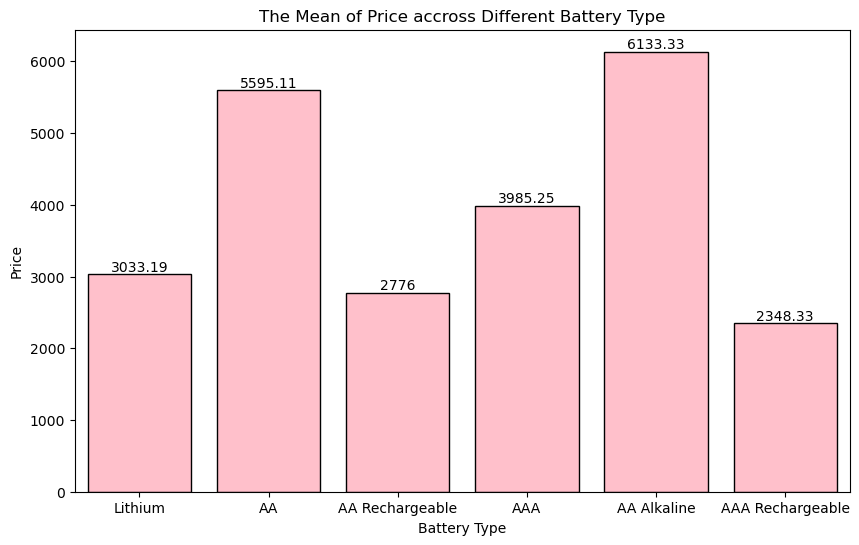

In [143]:
plt.figure(figsize=(10,6))
ty = sns.barplot(data = drone_df1,
           x = "Battery Type",
           y = "Price",facecolor="pink", edgecolor="black", errorbar = None)
for con in ty.containers:
    ty.bar_label(con)
    
plt.title("The Mean of Price accross Different Battery Type")
plt.show()

### 6.The Mean of Range accross Different Drone Type

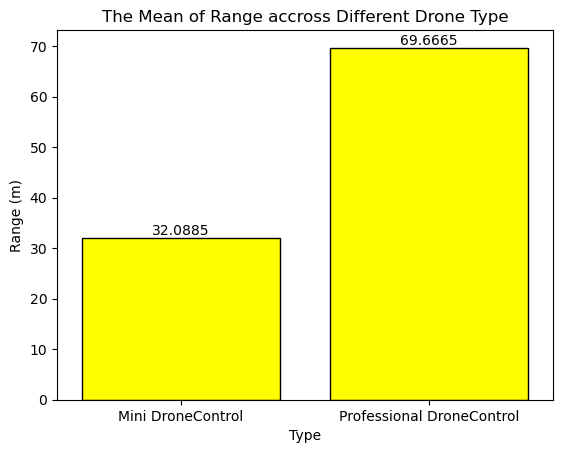

In [144]:

ty = sns.barplot(data = drone_df1,
           x = "Type",
           y = "Range (m)",facecolor="yellow", edgecolor="black",errorbar = None)
for con in ty.containers:
    ty.bar_label(con)
    
plt.title("The Mean of Range accross Different Drone Type")
plt.show()

### 7. The Mean of Offer accross Different Drone Brands

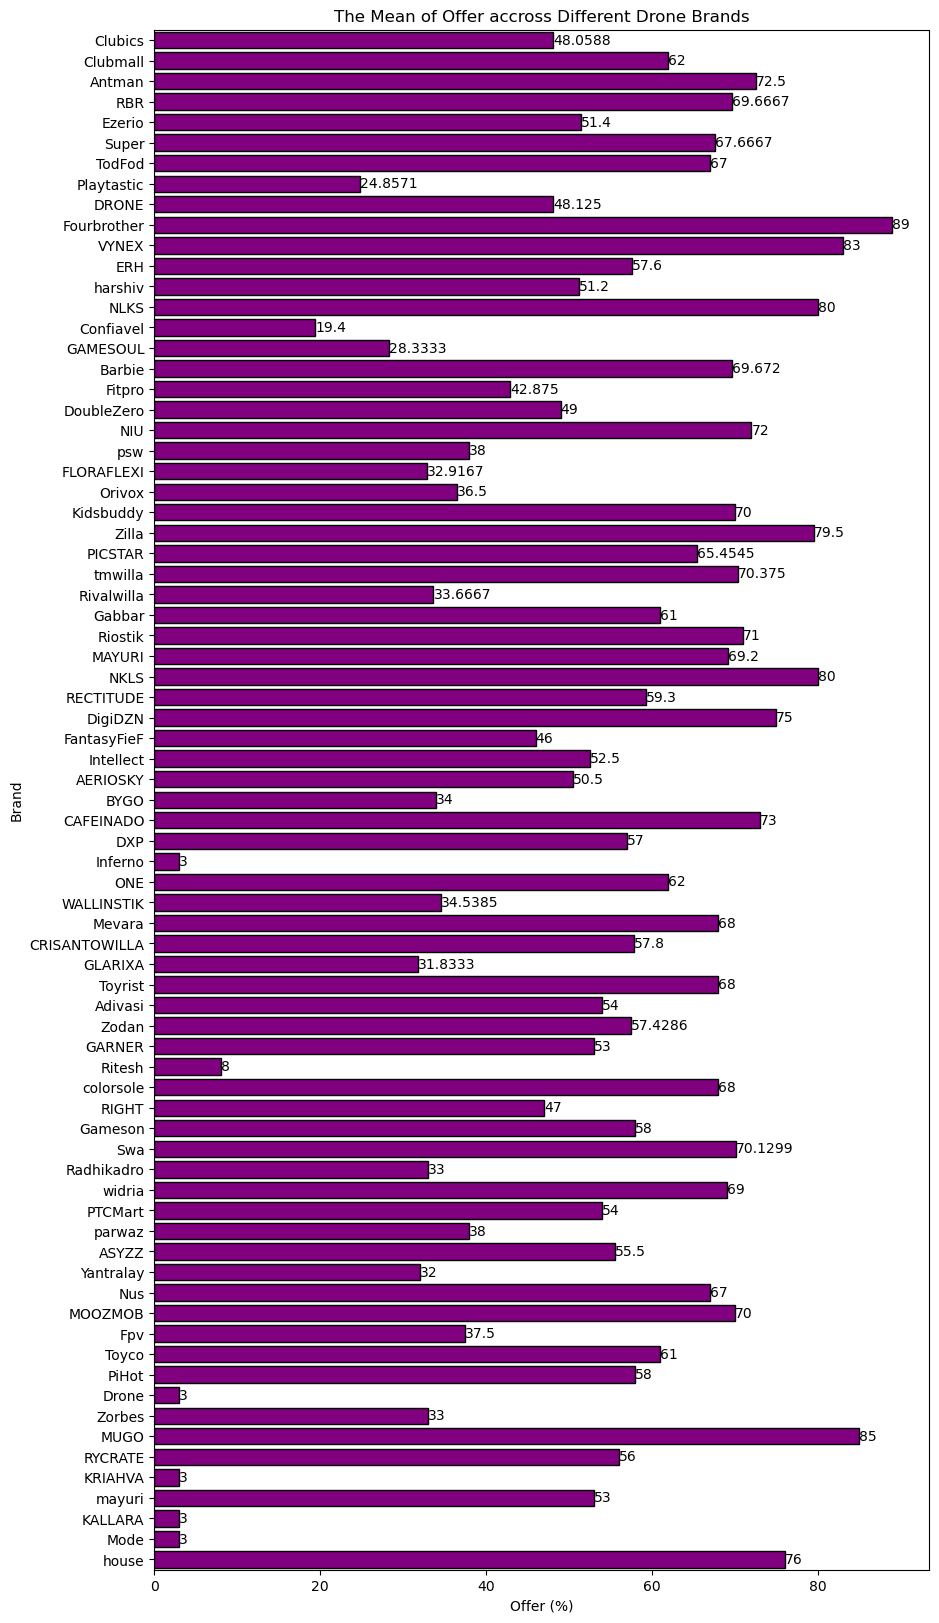

In [185]:
plt.figure(figsize=(10,20))
ty = sns.barplot(data = drone_df1,
           y = "Brand",
           x = "Offer (%)",
           facecolor="purple", 
           edgecolor="black",errorbar = None)
for con in ty.containers:
    ty.bar_label(con)
    
plt.title("The Mean of Offer accross Different Drone Brands")
plt.show()

### 8.Price Distribution by Drone Type

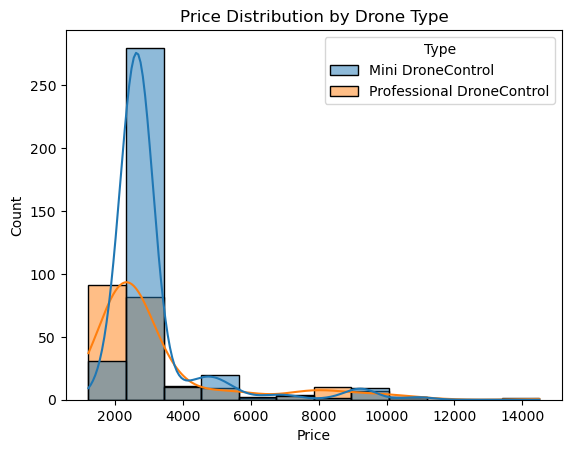

In [207]:
sns.histplot(data = drone_df1,
             x  = 'Price',
             bins=  12,
             kde=True,
             hue='Type',
            color = "m")
plt.title("Price Distribution by Drone Type")
plt.show()

### 9. Rating Distribution Across Types

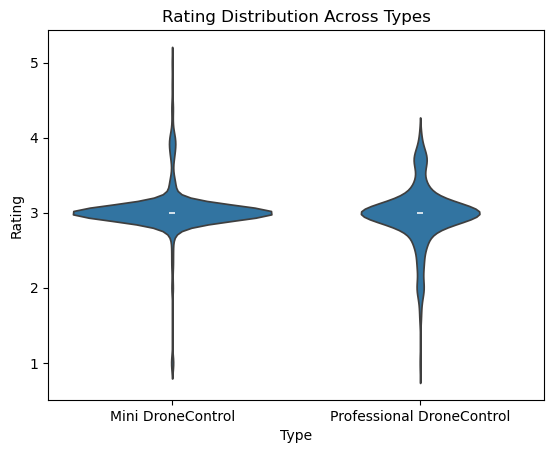

In [158]:
sns.violinplot(data=drone_df1, x='Type', y='Rating')
plt.title("Rating Distribution Across Types")
plt.show()

## Multivariate Plots

### 1.Price vs Rating by Battery Type

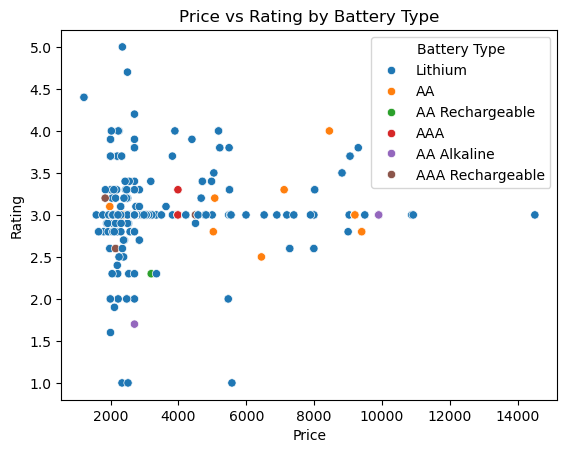

In [161]:
sns.scatterplot(data=drone_df1, x='Price', y='Rating', hue='Battery Type')
plt.title("Price vs Rating by Battery Type")
plt.show()

### 2. Price vs Rating by Drone Type

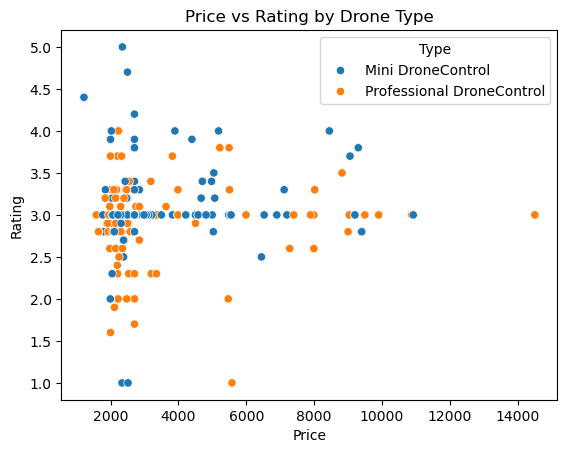

In [166]:
sns.scatterplot(data=drone_df1, x='Price', y='Rating', hue='Type')
plt.title("Price vs Rating by Drone Type")
plt.show()

### 3. The Mean of Range accross Different Drone Type By Battery Type

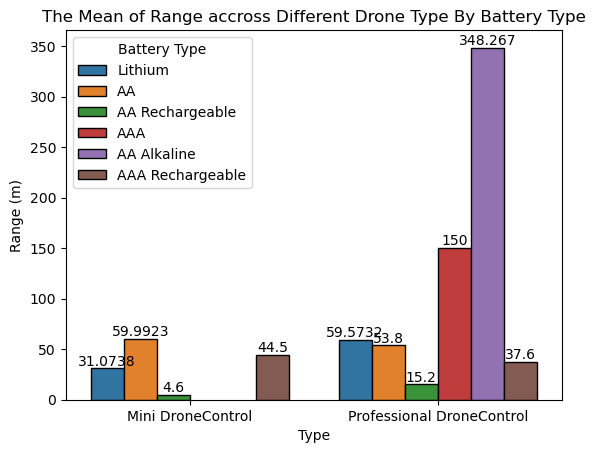

In [187]:

ty = sns.barplot(data = drone_df1,
           x = "Type",
           y = "Range (m)", edgecolor="black",errorbar = None,hue = "Battery Type")
for con in ty.containers:
    ty.bar_label(con)
    
plt.title("The Mean of Range accross Different Drone Type By Battery Type")
plt.show()

### 4. The Mean of Price accross Different Battery Type By Drone Type

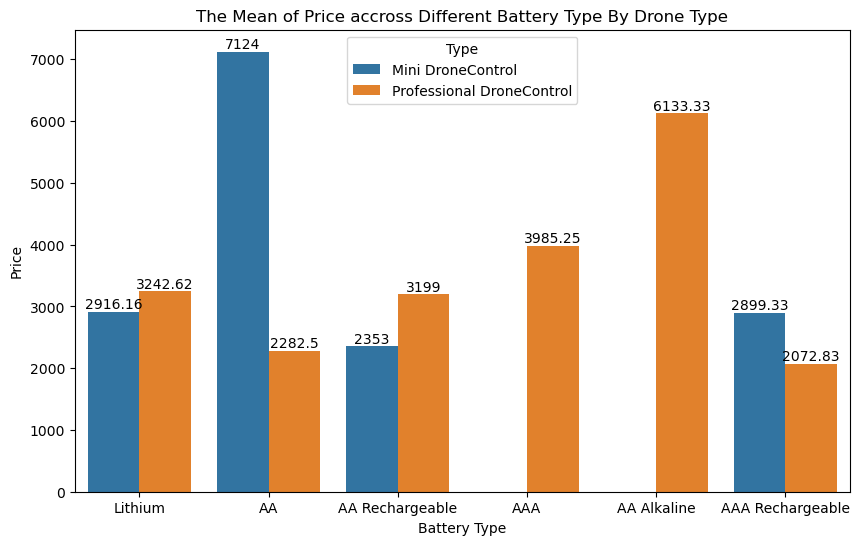

In [169]:
plt.figure(figsize=(10,6))
ty = sns.barplot(data = drone_df1,
           x = "Battery Type",
           y = "Price",errorbar = None, hue = "Type")
for con in ty.containers:
    ty.bar_label(con)
    
plt.title("The Mean of Price accross Different Battery Type By Drone Type")
plt.show()

### 5. The Mean of Weight accross Different Battery Type By Drone Type

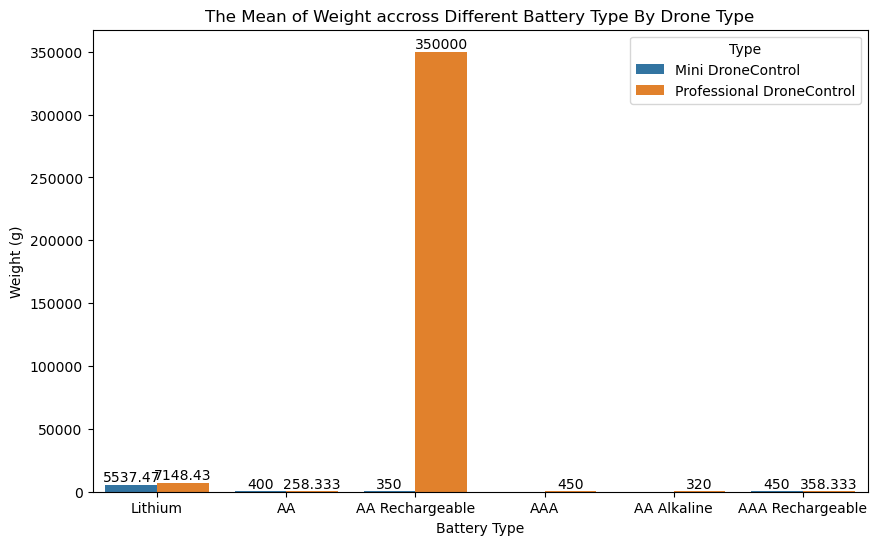

In [192]:
plt.figure(figsize=(10,6))
ty = sns.barplot(data = drone_df1,
           x = "Battery Type",
           y = "Weight (g)",errorbar = None, hue = "Type")
for con in ty.containers:
    ty.bar_label(con)
    
plt.title("The Mean of Weight accross Different Battery Type By Drone Type")
plt.show()

### 6. Correlation between Numaric Columns

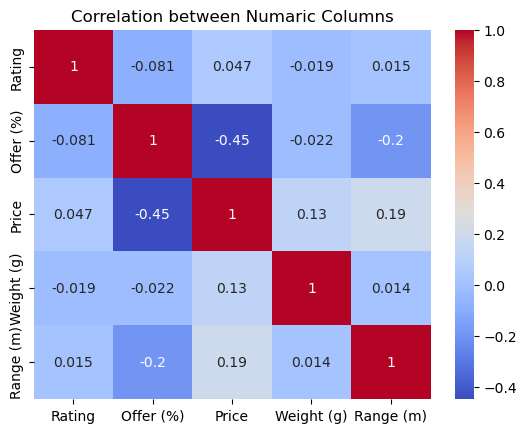

In [200]:
sns.heatmap(drone_df1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Numaric Columns")
plt.show()

### 7. Relation Between All Numarical columns

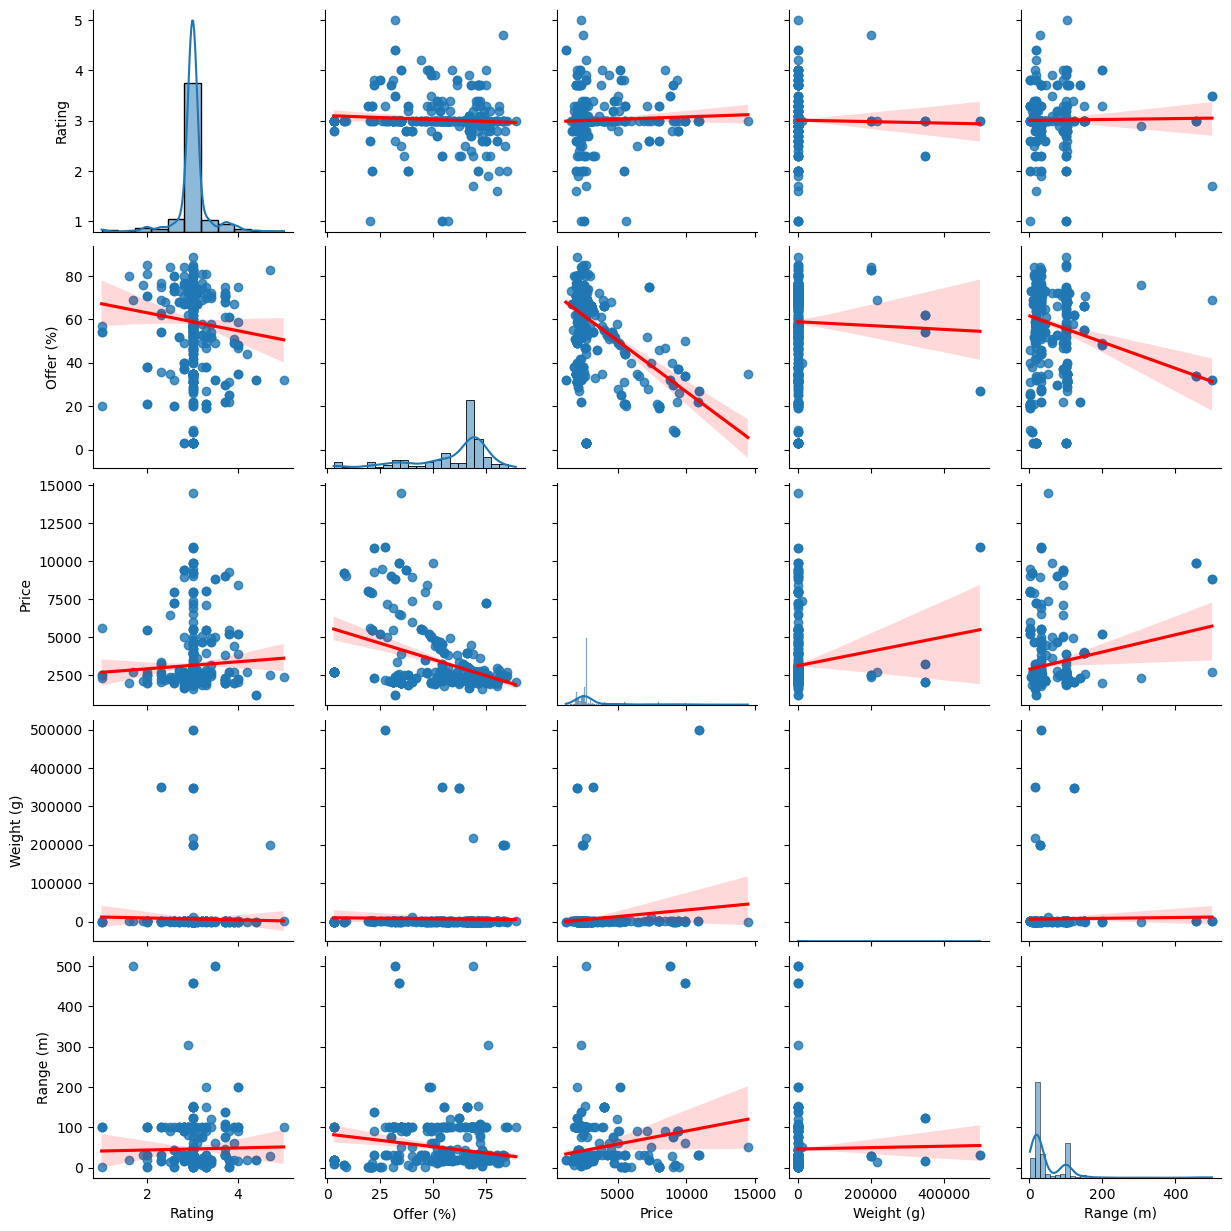

In [204]:
sns.pairplot(drone_df1, kind = "reg",
             plot_kws={"line_kws" : {"color" : "red" }},
             diag_kws= {"kde" : True})

plt.show()